Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

# Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
## Load Dataset
seg = pd.read_csv('/content/customer_segmentation.csv')
seg.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [74]:
## Check for Column names available in the dataset
seg.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [75]:
## Number of columns and row
seg.shape

(2240, 29)

2240 Rows and 29 Columns

In [76]:
## Check for Data types
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [77]:
## Check for null values in each column
seg.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Income Column has 24 Null values

In [78]:
## Drop the null values
seg.dropna(inplace= True)

In [79]:
seg.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [80]:
## Check for categories in Martal Status column with thier counts
seg['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [14]:
seg['Year_Birth'].value_counts()

,count
Year_Birth,
1976,89
1971,86
1975,83
1972,78
1978,76
1970,75
1965,74
1973,72
1969,70


In [81]:
## Check for categories in Education column wth thier counts
seg['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [82]:
## Adjust data type for date
seg['Dt_Customer'] = pd.to_datetime(seg['Dt_Customer'], dayfirst=True)

In [83]:
## Create a column for Total number of children
seg['Total_children'] = seg['Kidhome'] + seg['Teenhome']

In [84]:
## Create a column for Total Spendings
spendings = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

seg['Total_spendings'] = seg[spendings].sum(axis=1)

In [85]:
seg.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_children,Total_spendings
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,776


In [86]:
## Calulate Age for each cutomer
seg['Age'] = 2025 - seg['Year_Birth']

# EDA

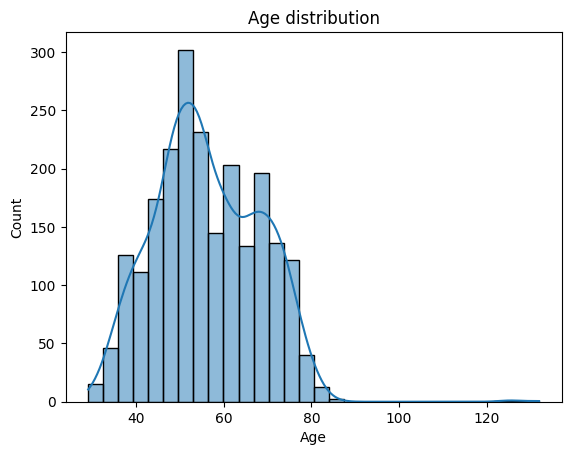

In [88]:
## Histoplot to represent age distribution
sns.histplot(seg['Age'], bins=30, kde=True)
plt.title('Age distribution')
plt.show()

-Most Customers are in their 50's and least customers are 80 and above years.

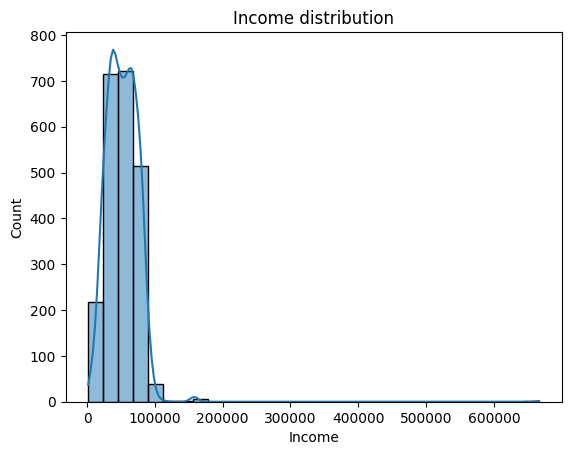

In [89]:
## Histoplot to represent Income distribution
sns.histplot(seg['Income'], bins=30, kde=True)
plt.title('Income distribution')
plt.show()

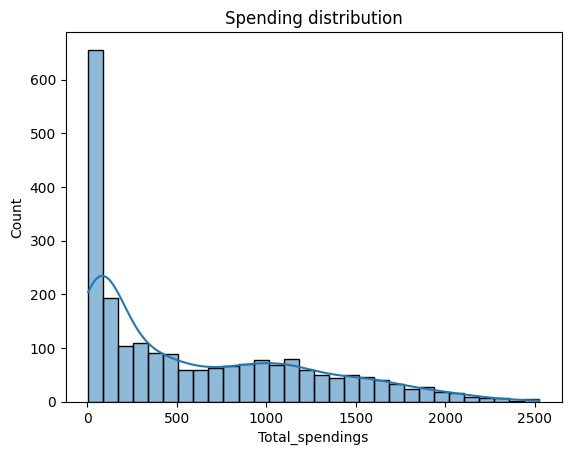

In [90]:
## Histoplot to represent Spending distribution
sns.histplot(seg['Total_spendings'], bins=30, kde=True)
plt.title('Spending distribution')
plt.show()

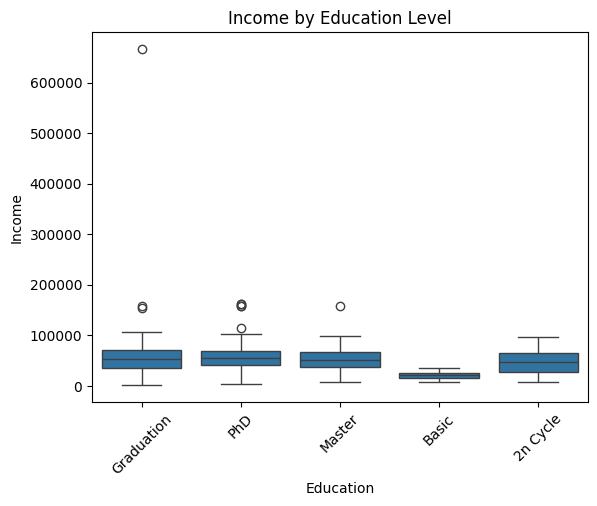

In [91]:
sns.boxplot(x='Education', y='Income', data=seg)
plt.xticks(rotation = 45)
plt.title('Income by Education Level')
plt.show()

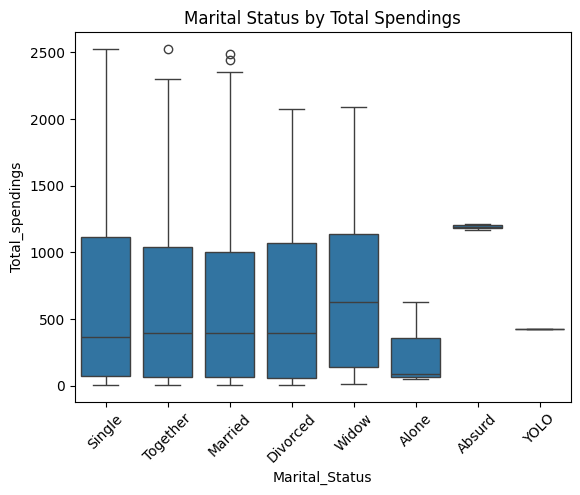

In [92]:
sns.boxplot(x='Marital_Status', y='Total_spendings', data=seg)
plt.xticks(rotation = 45)
plt.title('Marital Status by Total Spendings')
plt.show()

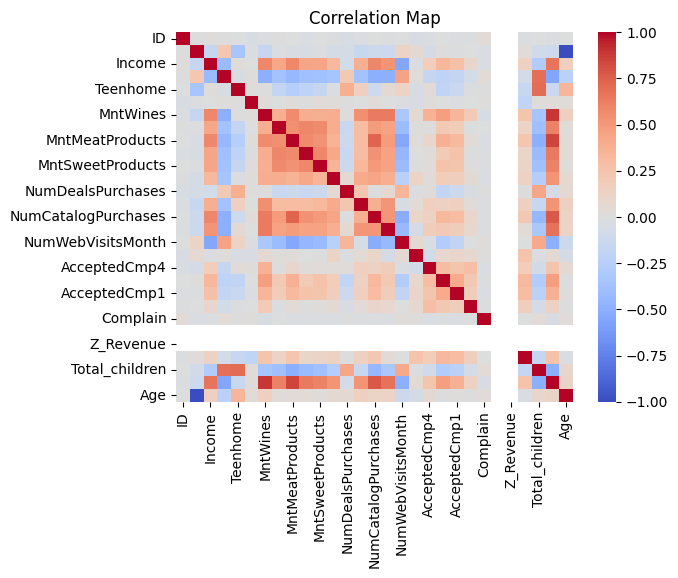

In [93]:
## Plot Heatmap to display Correlation
sns.heatmap(seg.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

In [94]:
group = seg.groupby('Education')['Total_spendings'].mean().sort_values(ascending= False)

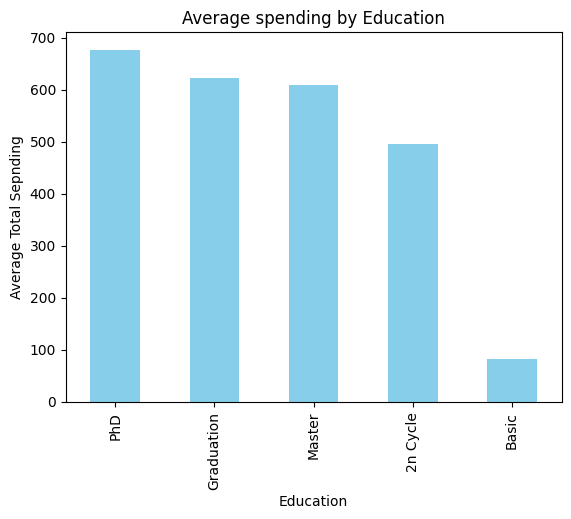

In [95]:
## Barplot to represent Average Spending by Education
group.plot(kind ='bar', color='skyblue')
plt.title('Average spending by Education')
plt.ylabel('Average Total Sepnding')
plt.show()

- People with PhD have the highest Average Total Spending while basic with the Lowest Average Total Spending.

In [96]:
age = seg.groupby('Age')['Income'].mean().sort_values(ascending= False)

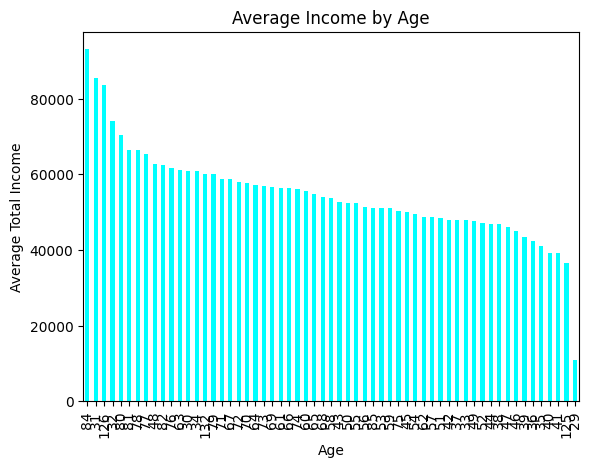

In [97]:
age.plot(kind ='bar', color='cyan')
plt.title('Average Income by Age')
plt.ylabel('Average Total Income')
plt.show()

#Preprocessing

In [98]:
## Define dataset features
X = seg[['Income',
       'Recency','NumWebPurchases','NumStorePurchases', 'NumWebVisitsMonth',
       'Total_children', 'Total_spendings', 'Age']]

In [99]:
## Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [100]:
X_scaled

array([[ 0.2340627 ,  0.31053212,  1.42855332, ..., -1.26480327,
         1.67548812,  0.98644293],
       [-0.23455948, -0.38050944, -1.12588116, ...,  1.40580564,
        -0.96235832,  1.23680074],
       [ 0.76947764, -0.79513438,  1.42855332, ..., -1.26480327,
         0.28024985,  0.31882209],
       ...,
       [ 0.18809052,  1.4507507 , -0.76096195, ..., -1.26480327,
         1.05169551, -1.01641959],
       [ 0.67538765, -1.41707178,  0.6987149 , ...,  0.07050118,
         0.39140438,  1.06989553],
       [ 0.02470453, -0.31140528, -0.39604274, ...,  1.40580564,
        -0.7218    ,  1.23680074]])

#Modelling

In [101]:
from sklearn.cluster import KMeans

In [102]:
css=[]

for i in range(2,10):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(X_scaled)
  css.append(kmeans.inertia_)


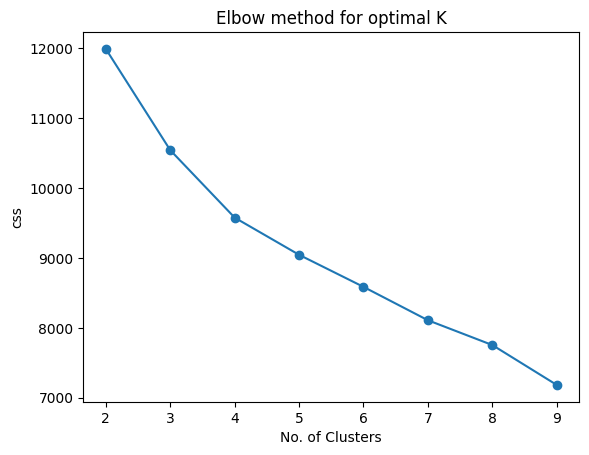

In [103]:
plt.plot(range(2,10), css, marker="o")
plt.title('Elbow method for optimal K')
plt.xlabel('No. of Clusters')
plt.ylabel('css')
plt.show()

In [104]:
kmeans = KMeans(n_clusters= 4)
seg['Cluster'] = kmeans.fit_predict(X_scaled)

In [70]:
seg.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_children,Total_spendings,Age,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,1617,68,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,27,71,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,776,60,3


In [105]:
seg['Cluster'].value_counts()

,count
Cluster,
2,1033
0,571
1,313
3,299
